<h1 style="color:blue;">Problem statement</h1>

Using Exploratory Data Analysis (EDA) for basic understanding the risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

1. ## Data sourcing

In [116]:
import numpy as np
import pandas as pd

In [117]:
loan_data = pd.read_csv("loan/loan.csv")
loan_data.head()

C:\Users\sbondugula\AppData\Local\Temp\ipykernel_19556\296403435.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("loan/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [118]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
loan_data.shape

(39717, 111)

2. ## Data cleaning

### Let us fix the missing values

In [120]:
loan_data.isna().sum()[loan_data.isna().sum()>0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

<AxesSubplot:>

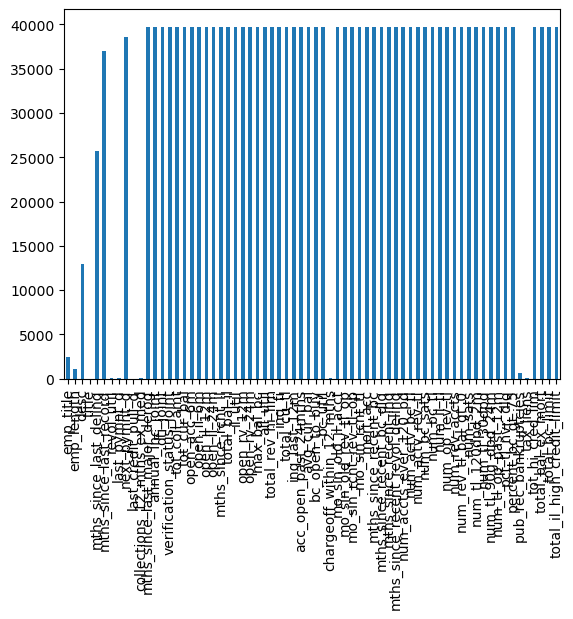

In [70]:
loan_data.isna().sum()[loan_data.isna().sum()>0].plot.bar()

It is observed that there are 68 columns which have atleast a missing value and also some columns have almost all null values.
As there are 39717 rows, let us make a cutoff of 10000 and delete all the columns which have more than 10000 null values/missing values

In [121]:
loan_data.isna().sum()[loan_data.isna().sum()>10000].index

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [122]:
loan_data.drop(columns=loan_data.isna().sum()[loan_data.isna().sum()>10000].index,inplace=True)

In [127]:
loan_data.shape

(39717, 53)

In [125]:
loan_data.isna().sum()[loan_data.isna().sum()>0]

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

Let us analyze the columns which have missing values

In [128]:
loan_data[loan_data.isna().sum()[loan_data.isna().sum()>0].index]

,emp_title,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Computer,83.70%,Jan-15,May-16,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,bike,9.40%,Apr-13,Sep-13,0.0,0.0,0.0,0.0
2,NaN,10+ years,real estate business,98.50%,Jun-14,May-16,0.0,0.0,0.0,0.0
3,AIR RESOURCES BOARD,10+ years,personel,21%,Jan-15,Apr-16,0.0,0.0,0.0,0.0
4,University Medical Group,1 year,Personal,53.90%,May-16,May-16,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
39712,FiSite Research,4 years,Home Improvement,13.10%,Jul-10,Jun-10,NaN,NaN,NaN,NaN
39713,"Squarewave Solutions, Ltd.",3 years,Retiring credit card debt,26.90%,Jul-10,Jul-10,NaN,NaN,NaN,NaN
39714,NaN,< 1 year,MBA Loan Consolidation,19.40%,Apr-08,Jun-07,NaN,NaN,NaN,NaN
39715,NaN,< 1 year,JAL Loan,0.70%,Jan-08,Jun-07,NaN,NaN,NaN,NaN


Let us analyze the number of unique values in each of the above columns

In [129]:
loan_data[loan_data.isna().sum()[loan_data.isna().sum()>0].index].nunique()

emp_title                     28820
emp_length                       11
title                         19615
revol_util                     1089
last_pymnt_d                    101
last_credit_pull_d              106
collections_12_mths_ex_med        1
chargeoff_within_12_mths          1
pub_rec_bankruptcies              3
tax_liens                         1
dtype: int64

emp_title and title columns have more unique values which does not have any impact on analysis. Let us remove them.

In [130]:
loan_data.drop(columns=["emp_title","title"],inplace=True)

In [131]:
loan_data.shape

(39717, 51)

Some columns have only one unique value. They cannot be used for any analysis. Let us remove them.

In [132]:
loan_data.drop(columns=loan_data.nunique()[loan_data.nunique()==1].index,inplace=True)

In [133]:
loan_data.shape

(39717, 42)

In [134]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [135]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

From the above columns - total_rec_int, total_rec_prncp, total_rec_late_fee, last_credit_pull_d, recoveries, collection_recovery_fee, last_pymnt_d,out_prncp,out_prncp_inv  are the features of post loan approval, which may not need for us to analyse loan approval.

In [136]:
loan_data.drop(columns=['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','out_prncp','out_prncp_inv'],inplace=True)

In [137]:
loan_data.shape

(39717, 33)

In [138]:
loan_data.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
last_pymnt_amnt            0
pub_rec_bankruptcies     697
dtype: int64

Now we have only three columns which have missing values. Let us now find what percent of rows, these columns have missing values. If the percentage is less, we can delete those rows. 

In [139]:
percent_of_missing_values = 100*loan_data.isna().sum()/len(loan_data)
percent_of_missing_values[100*loan_data.isna().sum()/len(loan_data)>0]

emp_length              2.706650
revol_util              0.125891
pub_rec_bankruptcies    1.754916
dtype: float64

As we can clearly see the percentage is less than 3, we can delete those rows with missing values.

In [140]:
loan_data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'],axis=0, inplace=True)

In [141]:
loan_data.isna().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
url                     0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
total_pymnt             0
total_pymnt_inv         0
last_pymnt_amnt         0
pub_rec_bankruptcies    0
dtype: int64

Now we have removed the missing / NAN values from the data

In [142]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,3,0,13648,83.70%,9,5863.155187,5833.84,171.62,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,5,3,0,1687,9.40%,4,1008.710000,1008.71,119.66,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2,2,0,2956,98.50%,10,3005.666844,3005.67,649.91,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,10,0,5598,21%,37,12231.890000,12231.89,357.48,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0,15,0,27783,53.90%,38,3513.330000,3513.33,67.79,0.0
